# **Depression and Psychedelics**
### UC San Diego: Data Science in Practice - EDA Checkpoint
##### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.


# - Neha Sharma
# - Vartan Pashayan
# - Alexander Levine
# - Sohaib Khan
## - Sneha Sairam


<a id='research_question'></a>
# Research Question



# Does the use of psychedelic mushrooms (PM) decrease or increase the occurrence of depression among adults with depression? In addition, what variables in publicly accessible datasets can be used to investigate this question?


# Data Wrangling & Configuration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, f_oneway

In [ ]:
df = pd.read_csv('https://datadryad.org/stash/downloads/file_stream/1212469')

In [ ]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')

# Round decimals when displaying DataFrames
pd.set_option('display.precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

# Data Cleaning
#1. Delete unnecessary columns + all other drug users
#2. Change column names
#3. Normalize columns
#4. Preliminary plots
#5. Cleaning up values, switching numbers to actual values so dataframe is readable




**I. Preliminary checks to understand the shape, size, and dynamics of our data.**

In [ ]:
df.shape

(7139, 57)

In [ ]:
null_rows = df.isnull().any(axis = 1).sum()
null_rows

0

In [ ]:
df.describe().round(2)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,HLS_YN,REGION,ED,EMPL,INCOME,BMI,C_TOTAL,C_DP,C_ANX,C_PN,C_ALL,C_MI,C_INSOM,C_HYP,C_DH,C_SA,C_GERD,C_CS,C_LIP,CCI_SCORE,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PCS12,MCS12,VR6D,RU_PCP_YN,RU_SPECIAL_YN,RU_OTPCP_YN,RU_UCC_YN,RU_OUTPT_YN,RU_ER_YN,RU_HSP_YN,PSY1_POSITIVE_USE,PSY2_GEN_HEALTH,PSY2_DIAG_CONDITION,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
count,7139.0,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.0,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.0,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00
mean,3570.0,-5.59,0.17,0.07,0.04,0.02,-91.60,0.46,46.15,1.95,0.08,2.63,0.73,0.30,64563.71,28.02,4.10,0.31,0.36,0.45,0.29,0.2,0.21,0.22,0.14,0.08,0.13,0.14,0.14,0.46,6.33,7.33,0.28,0.33,45.13,44.70,0.68,0.52,0.28,0.21,0.12,0.09,0.11,0.05,3.43,0.19,0.19,0.1,0.65,-95.41,-95.42,-95.43,-95.36,-95.36,-95.44,0.85,35200.66
std,2061.0,22.88,0.64,0.26,0.19,0.13,26.25,0.50,16.65,0.51,0.27,1.00,0.45,0.46,26258.63,7.25,3.64,0.46,0.48,0.50,0.46,0.4,0.41,0.42,0.35,0.27,0.34,0.34,0.35,1.00,5.89,6.99,0.45,0.47,10.34,12.54,0.12,0.50,0.45,0.41,0.32,0.28,0.32,0.21,1.25,0.40,0.39,0.3,0.48,18.56,18.51,18.49,18.87,18.88,18.45,0.36,12235.15
min,1.0,-99.00,0.00,0.00,0.00,0.00,-99.00,0.00,18.00,1.00,0.00,1.00,0.00,0.00,9076.00,11.16,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.94,0.69,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.0,0.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,0.00,13803.31
25%,1785.5,0.00,0.00,0.00,0.00,0.00,-99.00,0.00,33.00,2.00,0.00,2.00,0.00,0.00,46322.50,23.05,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,38.32,36.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.0,0.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,1.00,28356.81
50%,3570.0,0.00,0.00,0.00,0.00,0.00,-99.00,0.00,43.00,2.00,0.00,3.00,1.00,0.00,58129.00,26.58,3.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,5.00,0.00,0.00,47.14,45.51,0.68,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.0,1.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,1.00,31296.20
75%,5354.5,0.00,0.00,0.00,0.00,0.00,-99.00,1.00,60.00,2.00,0.00,3.00,1.00,1.00,77263.00,31.42,6.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,12.00,1.00,1.00,53.61,54.98,0.77,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.0,1.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,1.00,40791.23
max,7139.0,1.00,3.00,1.00,1.00,1.00,2.00,1.00,95.00,3.00,1.00,4.00,1.00,1.00,237841.00,73.12,28.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,21.00,27.00,1.00,1.00,69.93,72.67,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,4.00,4.00,1.00,1.00,143149.75


**II. Correlation matrix to understand what factors affected depression.**

In [ ]:
df.columns

Index(['CASEID_7139', 'COHORTS', 'PYS_USE_VENN', 'PSY_USE_YN', 'PM_USE_YN',
       'PM_USE_ONLY_YN', 'PM_VS_PSY_YN', 'SEX', 'AGE', 'ETHNICITY', 'HLS_YN',
       'REGION', 'ED', 'EMPL', 'INCOME', 'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN',
       'RU_OTPCP_YN', 'RU_UCC_YN', 'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN',
       'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION',
       'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE', 'PM1_GEN_HEALTH',
       'PM1_DIAG_CONDITION', 'PM1_UNDIAG_CONCERN', 'PM2_FREQ_COVID',
       'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE', 'DATA_WEIGHT'],
      dtype='object')

In [ ]:
selected_columns = df[['CASEID_7139', 'COHORTS', 'PYS_USE_VENN', 'PSY_USE_YN', 'PM_USE_YN',
       'PM_USE_ONLY_YN', 'PM_VS_PSY_YN', 'SEX', 'AGE', 'ETHNICITY', 'HLS_YN',
       'REGION', 'ED', 'EMPL', 'INCOME', 'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN',
       'RU_OTPCP_YN', 'RU_UCC_YN', 'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN',
       'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION',
       'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE', 'PM1_GEN_HEALTH',
       'PM1_DIAG_CONDITION', 'PM1_UNDIAG_CONCERN', 'PM2_FREQ_COVID',
       'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE', 'DATA_WEIGHT']]

# Calculate the correlation matrix between these columns
correlation_matrix = selected_columns.corr()

# Access the correlation value between "C_DP" and each other column
correlation_with_c_dp = correlation_matrix["C_DP"]

# Sort correlation_with_c_dp in descending order
sorted_correlation_with_c_dp = correlation_with_c_dp.sort_values(ascending=False)

sorted_correlation_with_c_dp.head(10)

C_DP          1.00
C_ANX         0.62
C_TOTAL       0.49
PHQ9_SCORE    0.48
GAD7_SCORE    0.45
PHQ9_GE10     0.42
GAD7_GE10     0.36
C_INSOM       0.28
C_PN          0.23
C_MI          0.22
Name: C_DP, dtype: float64

**III. Rudimentary plots to see the relationship between different features.**

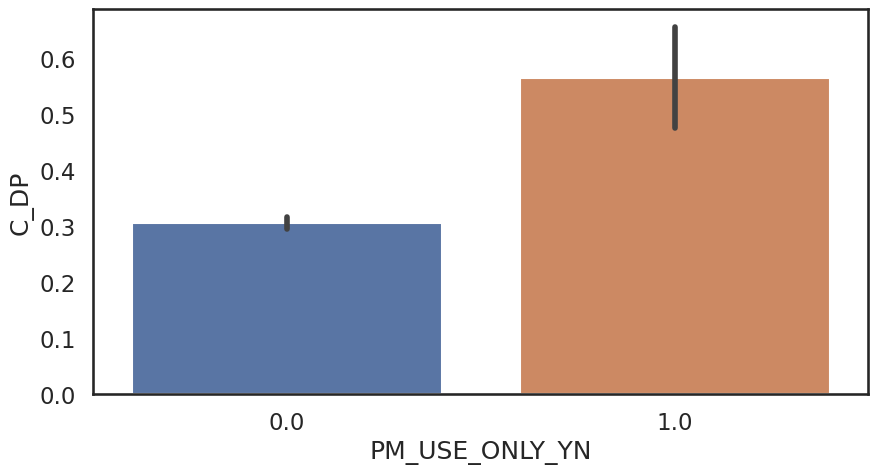

In [ ]:
#Plot for PM use only (no other psychedelic use) and it's affect on depression
plot_no_psy = sns.barplot(x='PM_USE_ONLY_YN', y = 'C_DP', data = df)

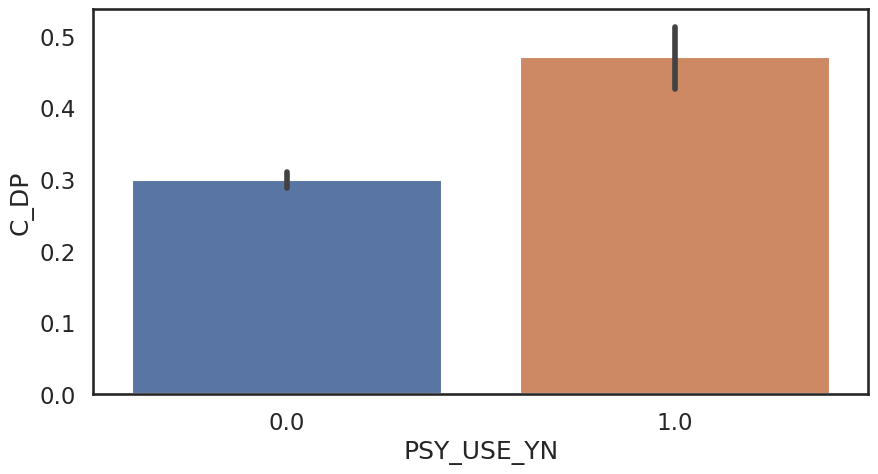

In [ ]:
#Plot for Affect PM depression w/Any Psychedlic use
plot_psy = sns.barplot(x='PSY_USE_YN', y = 'C_DP', data = df)

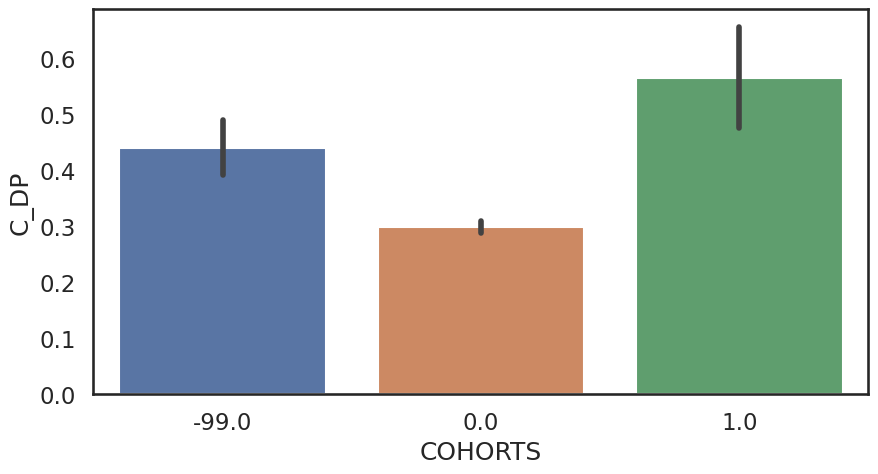

In [ ]:
comparison = sns.barplot(x='COHORTS', y = 'C_DP', data = df)

**IV. We realized that some of the numerical entries in the data were unnecessary and made it hard to understand. We replaced some of the numerical entires with their corresponding meanings.**

In [ ]:
df['PSY_USE_YN'].replace(to_replace=1, value='yes', inplace=True)
df['PSY_USE_YN'].replace(to_replace=0, value='no', inplace=True)
df['PM_USE_YN'].replace(to_replace=1, value='yes', inplace=True)
df['PM_USE_YN'].replace(to_replace=0, value='no', inplace=True)
df['PM_USE_ONLY_YN'].replace(to_replace=1, value='yes', inplace=True)
df['PM_USE_ONLY_YN'].replace(to_replace=0, value='no', inplace=True)
df['C_DP'].replace(to_replace=1, value='yes', inplace=True)
df['C_DP'].replace(to_replace=0, value='no', inplace=True)
df['SEX'].replace(to_replace=0, value='female', inplace=True)
df['SEX'].replace(to_replace=1, value='male', inplace=True)

df['COHORTS'].replace(to_replace=0, value='no psy use', inplace=True)
df['COHORTS'].replace(to_replace=1, value='pm use only', inplace=True)
df['COHORTS'].replace(to_replace=-99, value='other psy users', inplace=True)
df['PYS_USE_VENN'].replace(to_replace=0, value="no psy use", inplace=True)
df['PYS_USE_VENN'].replace(to_replace=1, value="pm use only", inplace=True)
df['PYS_USE_VENN'].replace(to_replace=2, value="pm w/other psy", inplace=True)
df['PYS_USE_VENN'].replace(to_replace=3, value="psy w/no pm", inplace=True)
df["ETHNICITY"].replace(to_replace=1, value="black", inplace=True)
df["ETHNICITY"].replace(to_replace=2, value="white", inplace=True)
df["ETHNICITY"].replace(to_replace=3, value="other", inplace=True)
# Other stands for American Indian or Alaska Native, Asian, Native Hawaiian or Other Pacific Islander
df['HLS_YN'].replace(to_replace=1, value='yes', inplace=True)
df['HLS_YN'].replace(to_replace=0, value='no', inplace=True)
df['REGION'].replace(to_replace=1, value='northwest', inplace=True)
df['REGION'].replace(to_replace=2, value='midwest', inplace=True)
df['REGION'].replace(to_replace=3, value='south', inplace=True)
df['REGION'].replace(to_replace=4, value='west', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=1, value='strongly agree', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=2, value='agree', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=3, value='neutral', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=4, value='disagree', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=5, value='strongly disagree', inplace=True)
df['PSY2_DIAG_CONDITION'].replace(to_replace=1, value='yes', inplace=True)
df['PSY2_DIAG_CONDITION'].replace(to_replace=0, value='no', inplace=True)
df['PM1_GEN_HEALTH'].replace(to_replace=0, value='no', inplace=True)
df['PM1_GEN_HEALTH'].replace(to_replace=1, value='yes', inplace=True)
df['PM1_GEN_HEALTH'].replace(to_replace=-99, value='not pm only', inplace=True)
df['PM1_DIAG_CONDITION'].replace(to_replace=0, value='no', inplace=True)
df['PM1_DIAG_CONDITION'].replace(to_replace=1, value='yes', inplace=True)
df['PM1_DIAG_CONDITION'].replace(to_replace=-99, value='not pm only', inplace=True)
df['PM1_UNDIAG_CONCERN'].replace(to_replace=0, value='no', inplace=True)
df['PM1_UNDIAG_CONCERN'].replace(to_replace=1, value='yes', inplace=True)
df['PM1_UNDIAG_CONCERN'].replace(to_replace=-99, value='not pm only', inplace=True)

**V. With this information we now felt confident in cleaning the data of unnecessary information unrelated to our project.**

In [ ]:
#Renaming 'CASEID_7139' to just 'CASE ID' and setting it as index
df.rename(columns = {"CASEID_7139":"CASE_ID"}, inplace = True)
df.set_index("CASE_ID", inplace = True)
df

,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,HLS_YN,REGION,ED,EMPL,INCOME,BMI,C_TOTAL,C_DP,C_ANX,C_PN,C_ALL,C_MI,C_INSOM,C_HYP,C_DH,C_SA,C_GERD,C_CS,C_LIP,CCI_SCORE,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PCS12,MCS12,VR6D,RU_PCP_YN,RU_SPECIAL_YN,RU_OTPCP_YN,RU_UCC_YN,RU_OUTPT_YN,RU_ER_YN,RU_HSP_YN,PSY1_POSITIVE_USE,PSY2_GEN_HEALTH,PSY2_DIAG_CONDITION,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
CASE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,pm use only,pm use only,yes,yes,yes,2.0,female,19.0,other,yes,west,0.0,0.0,65847,27.41,3.0,no,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,0.0,0.0,48.99,37.90,0.67,0,0,0,0,0,0,0,neutral,1,no,0,0,yes,no,no,2,3,0,0,57772.54
2,pm use only,pm use only,yes,yes,yes,2.0,female,21.0,white,no,midwest,1.0,0.0,30585,29.26,0.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.21,57.93,0.86,0,1,0,0,0,1,0,strongly agree,0,no,1,0,yes,no,no,3,3,0,1,25738.42
3,pm use only,pm use only,yes,yes,yes,2.0,female,22.0,white,no,west,0.0,0.0,49259,20.60,9.0,yes,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,17.0,1.0,1.0,33.83,25.91,0.47,0,0,0,1,0,1,0,neutral,1,yes,1,0,no,no,no,3,4,0,0,42172.56
4,pm use only,pm use only,yes,yes,yes,2.0,female,22.0,white,no,south,1.0,0.0,54135,18.56,2.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,15.0,0.0,1.0,61.63,25.13,0.67,1,0,0,0,0,0,0,agree,1,yes,0,0,yes,no,no,3,3,0,1,28356.81
5,pm use only,pm use only,yes,yes,yes,2.0,female,23.0,white,no,midwest,0.0,1.0,49425,36.80,4.0,yes,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,15.0,1.0,1.0,38.54,45.53,0.64,0,0,1,0,0,1,0,agree,1,yes,1,0,yes,no,no,3,3,0,1,25738.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,other psy users,pm w/other psy,yes,yes,no,2.0,male,60.0,white,no,northwest,1.0,0.0,49677,22.47,3.0,no,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,11.0,1.0,1.0,55.18,46.86,0.73,0,1,0,0,0,0,0,strongly agree,1,yes,1,0,no,no,no,3,3,0,1,59464.33
7136,other psy users,psy w/no pm,yes,no,no,1.0,male,64.0,black,no,west,1.0,0.0,83209,40.24,4.0,no,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,38.33,38.54,0.60,1,1,0,0,0,0,0,neutral,0,no,0,1,not pm only,not pm only,not pm only,-99,-99,-99,1,15186.20
7137,other psy users,psy w/no pm,yes,no,no,1.0,male,64.0,white,no,west,1.0,0.0,63911,22.71,3.0,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,52.82,51.77,0.78,0,0,0,0,0,0,0,agree,1,yes,0,0,not pm only,not pm only,not pm only,-99,-99,-99,1,57633.55


In [ ]:
#Dropping repetitive columns and columns not related to Depression as that is our main objective
pd.set_option('display.max_columns', None)

depression_only = df.drop(columns = ['C_TOTAL', 'HLS_YN','C_ALL','C_MI','C_HYP', 'C_DH', 'C_SA',
                                    'C_GERD', 'C_CS', 'C_LIP', 'CCI_SCORE', 'PCS12',
                                    'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN', 'RU_OTPCP_YN', 'RU_UCC_YN',
                                    'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN', 'PSY2_GEN_HEALTH','PSY2_UNDIAG_CONCERN',
                                     'PM2_FREQ_COVID', 'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE',
                                    'DATA_WEIGHT', 'PSY2_NO_KNOWLEDGE', 'PM_VS_PSY_YN', 'COHORTS', 'PSY_USE_YN',
                                    'PM_USE_YN', 'PM_USE_ONLY_YN'])

depression_only
# IF GAD7 (General Anxiety Disorder Scale) Score > 10, then they have moderate to severe anxiety
# IF PHQ9 (Patient Health Questionare) Score > 10, then they have moderate to severe depression

,PYS_USE_VENN,SEX,AGE,ETHNICITY,REGION,ED,EMPL,INCOME,BMI,C_DP,C_ANX,C_PN,C_INSOM,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PSY1_POSITIVE_USE,PSY2_DIAG_CONDITION,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN
CASE_ID,,,,,,,,,,,,,,,,,,,,,,
1,pm use only,female,19.0,other,west,0.0,0.0,65847,27.41,no,1.0,0.0,0.0,3.0,8.0,0.0,0.0,neutral,no,yes,no,no
2,pm use only,female,21.0,white,midwest,1.0,0.0,30585,29.26,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,strongly agree,no,yes,no,no
3,pm use only,female,22.0,white,west,0.0,0.0,49259,20.60,yes,1.0,1.0,0.0,21.0,17.0,1.0,1.0,neutral,yes,no,no,no
4,pm use only,female,22.0,white,south,1.0,0.0,54135,18.56,yes,1.0,0.0,0.0,5.0,15.0,0.0,1.0,agree,yes,yes,no,no
5,pm use only,female,23.0,white,midwest,0.0,1.0,49425,36.80,yes,1.0,0.0,0.0,13.0,15.0,1.0,1.0,agree,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,pm w/other psy,male,60.0,white,northwest,1.0,0.0,49677,22.47,no,1.0,0.0,0.0,14.0,11.0,1.0,1.0,strongly agree,yes,no,no,no
7136,psy w/no pm,male,64.0,black,west,1.0,0.0,83209,40.24,no,0.0,1.0,1.0,4.0,4.0,0.0,0.0,neutral,no,not pm only,not pm only,not pm only
7137,psy w/no pm,male,64.0,white,west,1.0,0.0,63911,22.71,no,0.0,0.0,0.0,3.0,3.0,0.0,0.0,agree,yes,not pm only,not pm only,not pm only


In [ ]:
# Rename columns to increase readability

renamed_columns = renamed_columns = ['psy_use_venn', 'sex', 'age', 'ethnicity', 'region', 'education',
                   'empl', 'income', 'bmi', 'depression', 'anxiety', 'chronic_pain','insomnia', 'gad7_score',
                   'phq9_score','severe_anxiety','severe_depression','psy1_positive_use', 'psy2_diag_condition',
                   'pm1_gen_health', 'pm1_diag_condition', 'pm1_undiag_concern']

depression_only.columns = renamed_columns

In [ ]:
del df
df = depression_only

In [ ]:
df

,psy_use_venn,sex,age,ethnicity,region,education,empl,income,bmi,depression,anxiety,chronic_pain,insomnia,gad7_score,phq9_score,severe_anxiety,severe_depression,psy1_positive_use,psy2_diag_condition,pm1_gen_health,pm1_diag_condition,pm1_undiag_concern
CASE_ID,,,,,,,,,,,,,,,,,,,,,,
1,pm use only,female,19.0,other,west,0.0,0.0,65847,27.41,no,1.0,0.0,0.0,3.0,8.0,0.0,0.0,neutral,no,yes,no,no
2,pm use only,female,21.0,white,midwest,1.0,0.0,30585,29.26,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,strongly agree,no,yes,no,no
3,pm use only,female,22.0,white,west,0.0,0.0,49259,20.60,yes,1.0,1.0,0.0,21.0,17.0,1.0,1.0,neutral,yes,no,no,no
4,pm use only,female,22.0,white,south,1.0,0.0,54135,18.56,yes,1.0,0.0,0.0,5.0,15.0,0.0,1.0,agree,yes,yes,no,no
5,pm use only,female,23.0,white,midwest,0.0,1.0,49425,36.80,yes,1.0,0.0,0.0,13.0,15.0,1.0,1.0,agree,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,pm w/other psy,male,60.0,white,northwest,1.0,0.0,49677,22.47,no,1.0,0.0,0.0,14.0,11.0,1.0,1.0,strongly agree,yes,no,no,no
7136,psy w/no pm,male,64.0,black,west,1.0,0.0,83209,40.24,no,0.0,1.0,1.0,4.0,4.0,0.0,0.0,neutral,no,not pm only,not pm only,not pm only
7137,psy w/no pm,male,64.0,white,west,1.0,0.0,63911,22.71,no,0.0,0.0,0.0,3.0,3.0,0.0,0.0,agree,yes,not pm only,not pm only,not pm only


# Exploratory Data Analysis & Results (EDA)

## The PHQ-9 score is a set of 9 questions that doctors use to gauge whether a patient may be depressed. The questions ask about feelings like sadness, lack of interest in activities, sleep issues, appetite changes, feelings of failure, trouble concentrating, restlessness, and thoughts of self-harm. Patients rate how often they've felt each symptom in the past 2 weeks on a scale from 0 (not at all) to 3 (nearly every day).  And the tallies are added up the higher the score the worse health the patient is in  with 27 being the highest score, this helps doctors understand the severity of the potential depression.

Kroenke K, Spitzer RL, Williams JB. The PHQ-9: validity of a brief depression severity measure. J Gen Intern Med. 2001 Sep;16(9):606-13. doi: 10.1046/j.1525-1497.2001.016009606.x. PMID: 11556941; PMCID: PMC1495268.*italicized text*

**I. Generated plots with cleaned data to gauge the superficial relationship between depression and PM use.**

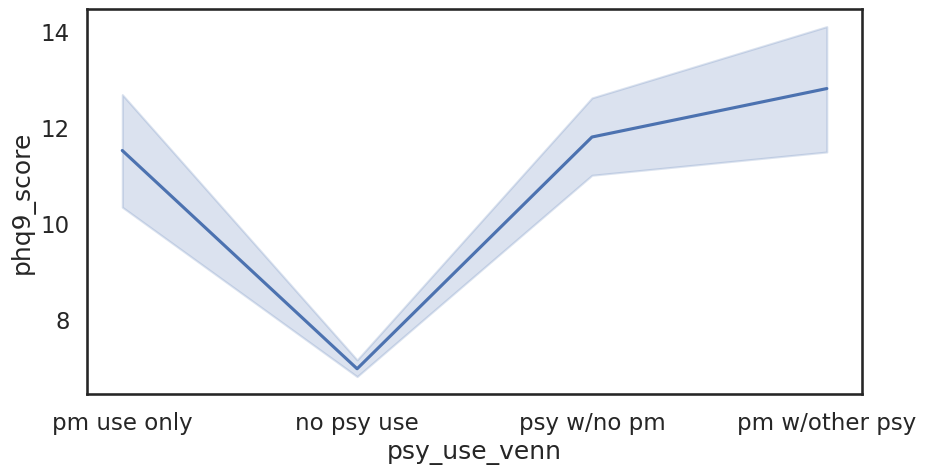

In [ ]:
plot_dep = sns.lineplot(x='psy_use_venn', y = 'phq9_score', legend = 'full', data = df)
#plot_dep = sns.barplot(x='psy_use_venn', hue = 'depression', data = df)

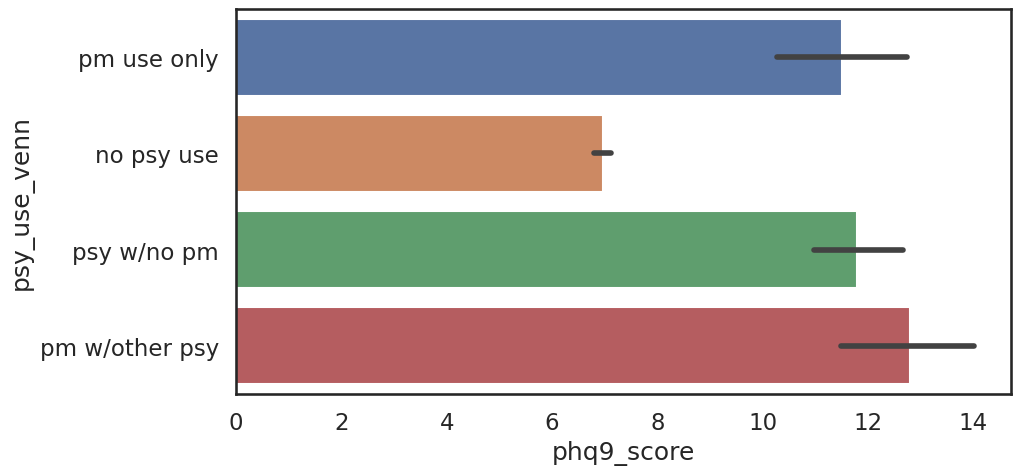

In [ ]:
dep_bar = sns.barplot(x='phq9_score', y = 'psy_use_venn', data = df)


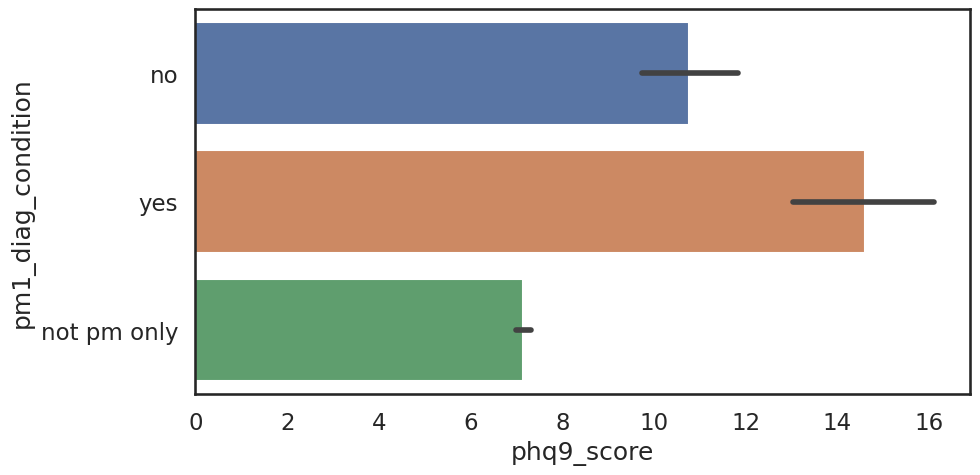

In [ ]:
#Used PM specifically for improving depression, PTSD, addiction, etc
dep_bar = sns.barplot(x='phq9_score', y = 'pm1_diag_condition', data = df)

**Analysis: From our superficial analysis thusfar it seems that psychedelic mushroom usage actually causes depression to increase. Our plan is to look deeper into what other features impact the interaction between psychedelic mushroom usage and depression. We will begin by exploring the top 5 most correlated features with depression.**



## Anxiety

```
Potential things to explore:
- Are those who are suffering from anxiety benefit more from psychedelic usage than those who do not suffer from anxiety?
```



#### **I. Anxiety vs. Depression**

In [ ]:
# Change binary entries to categorical
df['anxiety'].replace(to_replace = 0, value = 'no', inplace = True)
df['anxiety'].replace(to_replace = 1, value = 'yes', inplace = True)

df["anxiety"].value_counts()

no     4602
yes    2537
Name: anxiety, dtype: int64

11.406385494678755
5.083441981747066


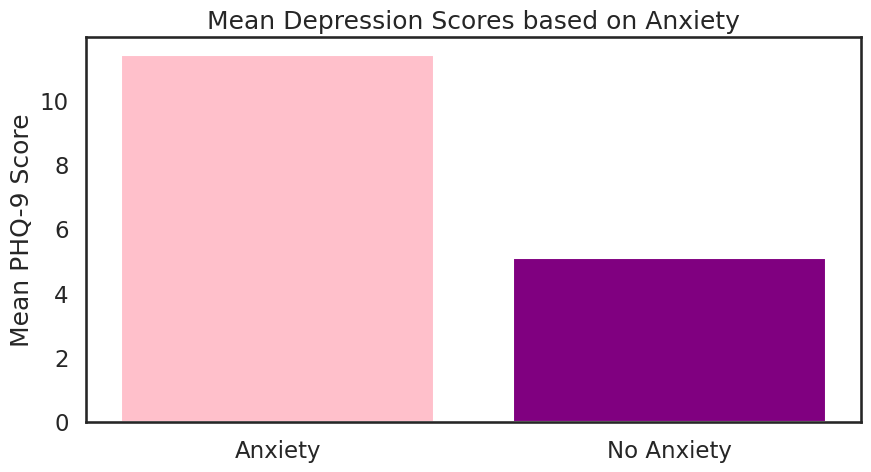

In [ ]:
# Separate data based on chronic pain
anxiety = df[df["anxiety"] == 'yes']
no_anxiety = df[df["anxiety"] == 'no']

# Calculate the mean depression score for both cohorts
mean_anxiety = anxiety['phq9_score'].mean()
mean_no_anxiety = no_anxiety['phq9_score'].mean()

print(mean_anxiety)
print(mean_no_anxiety)

# Plot the means using a bar plot
plt.bar(['Anxiety', 'No Anxiety'], [mean_anxiety, mean_no_anxiety], color=['pink', 'purple'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores based on Anxiety')
plt.show()

In [ ]:
t_val, p_val = ttest_ind(anxiety['phq9_score'], no_anxiety['phq9_score'])
print(p_val)

0.0


**It is evident anxiety and depression are heavily correlated. Those who experienced anxiety had a drastically higher average depression score than those who did not experience anxiety. In addition, the p-value is practically zero, thus further supporting this finding.**

#### **II. Anxiety & Psychedelic Mushroom Use vs. Depression**

In [ ]:
# Seperate data based on anxiety
anxiety_and_PM = df[(df["anxiety"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_anxiety_and_PM = df[(df["anxiety"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

# Calculate the mean depression for both cohorts
mean_anxiety = anxiety_and_PM['phq9_score'].mean()
mean_no_anxiety = no_anxiety_and_PM['phq9_score'].mean()

print(mean_anxiety)
print(mean_no_anxiety)

12.836065573770492
10.180327868852459


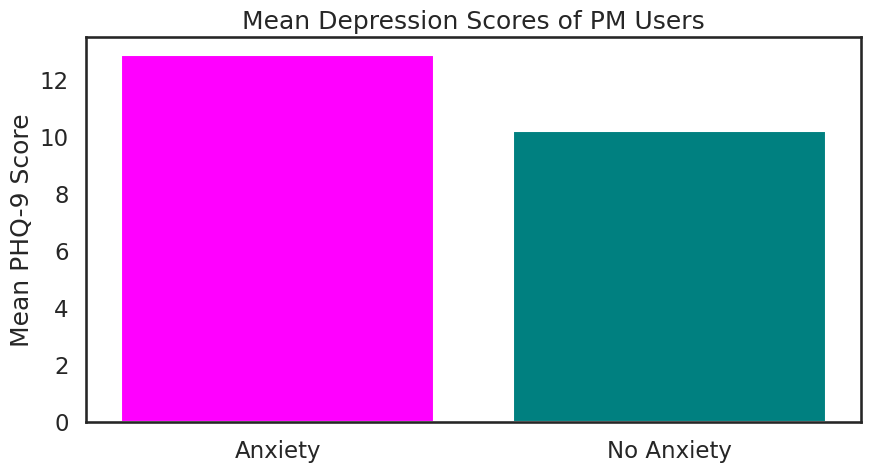

In [ ]:
# Plot the means using a bar plot
plt.bar(['Anxiety', 'No Anxiety'], [mean_anxiety, mean_no_anxiety], color=['magenta', 'teal'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores of PM Users')
plt.show()

In [ ]:
t_val, p_val = ttest_ind(anxiety_and_PM['phq9_score'], no_anxiety_and_PM['phq9_score'])
print(p_val)

0.03619038555358457


Given that the p-value is less than 0.05, there seems to be a difference in depression scores between pm users with anxiety and those without anxiety.

## Chronic Pain



```
Potential things to explore:
- Are those who are suffering from chronic pain benefit more from psychedelic usage than those who do not suffer from chronic pain?
```



#### **I. Chronic Pain vs. Depression**

In [ ]:
# Change binary entries to categorical
df['chronic_pain'].replace(to_replace = 0, value = 'no', inplace = True)
df['chronic_pain'].replace(to_replace = 1, value = 'yes', inplace = True)

df["chronic_pain"].value_counts()

no     3957
yes    3182
Name: chronic_pain, dtype: int64

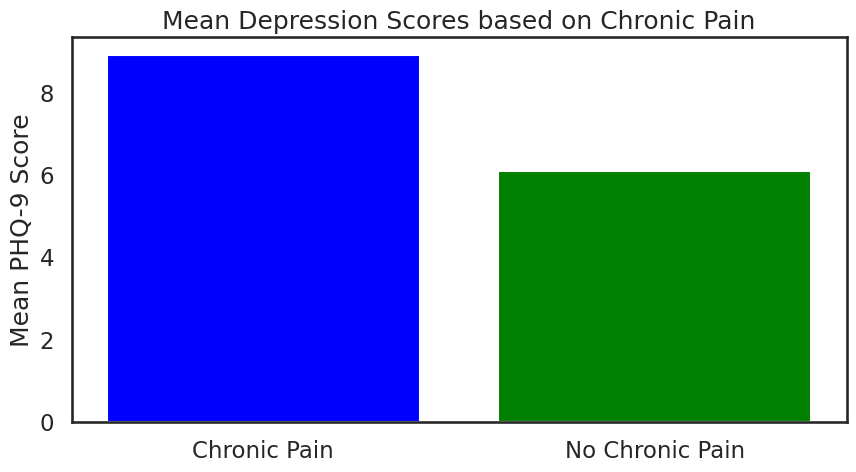

In [ ]:
# Separate data based on chronic pain
chronic_pain = df[df["chronic_pain"] == 'yes']
no_chronic_pain = df[df["chronic_pain"] == 'no']

# Calculate the mean depression score for both cohorts
mean_chronic_pain = chronic_pain['phq9_score'].mean()
mean_no_chronic_pain = no_chronic_pain['phq9_score'].mean()

# Plot the means using a bar plot
plt.bar(['Chronic Pain', 'No Chronic Pain'], [mean_chronic_pain, mean_no_chronic_pain], color=['blue', 'green'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores based on Chronic Pain')
plt.show()

In [ ]:
t_val, p_val = ttest_ind(chronic_pain['phq9_score'], no_chronic_pain['phq9_score'])
print(p_val)

1.0160195622988894e-65




```
# This is formatted as code
```

*Those who experience chronic pain also have a higher average depression score. More specifically, 2.82 points higher. In addition, the p-value is practically zero, indicating that the difference is statistically significant.*

Chronic pain and phq9 scores

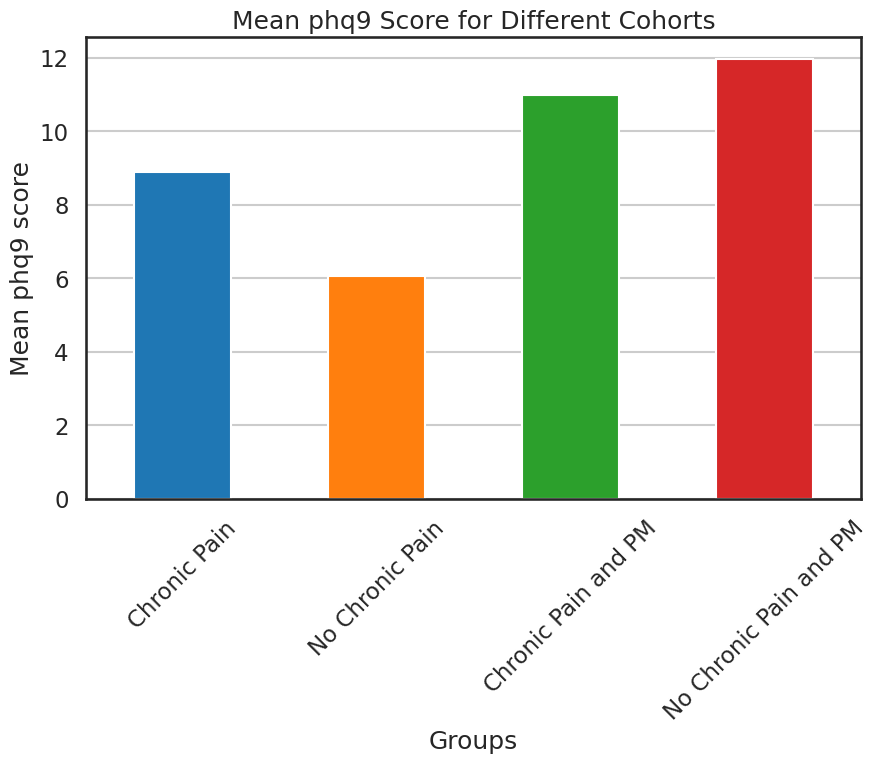

In [ ]:
chronic_pain = df[df["chronic_pain"] == 'yes']
no_chronic_pain = df[df["chronic_pain"] == 'no']

chronic_pain_and_PM = df[(df["chronic_pain"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_chronic_pain_and_PM = df[(df["chronic_pain"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

mean_scores = {
    "Chronic Pain": chronic_pain['phq9_score'].mean(),
    "No Chronic Pain": no_chronic_pain['phq9_score'].mean(),
    "Chronic Pain and PM": chronic_pain_and_PM['phq9_score'].mean(),
    "No Chronic Pain and PM": no_chronic_pain_and_PM['phq9_score'].mean(),
}

mean_scores_series = pd.Series(mean_scores)

plt.figure(figsize=(10, 6))
mean_scores_series.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Groups')
plt.ylabel('Mean phq9 score')
plt.title('Mean phq9 Score for Different Cohorts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### **II. Chronic Pain & Psychedelic Mushroom Use vs. Depression**

In [ ]:
df["psy_use_venn"].value_counts()

no psy use        6613
psy w/no pm        270
pm w/other psy     134
pm use only        122
Name: psy_use_venn, dtype: int64

11.0
11.96875


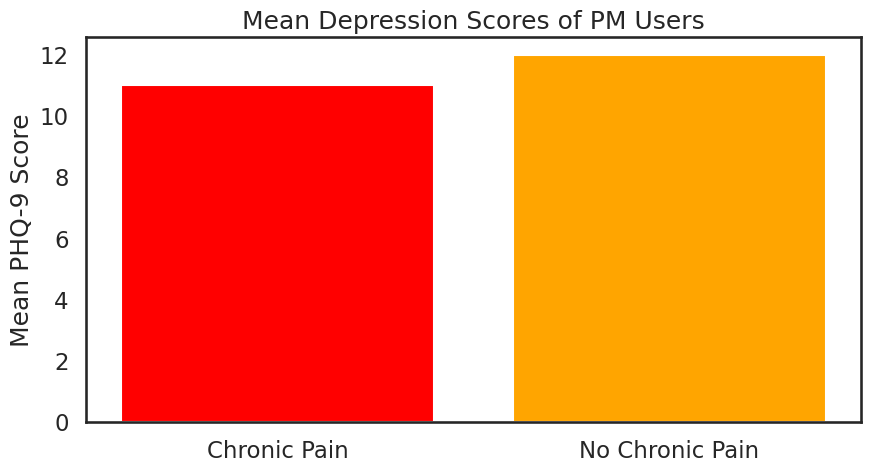

In [ ]:
# Seperate data based on chronic pain
chronic_pain_and_PM = df[(df["chronic_pain"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_chronic_pain_and_PM = df[(df["chronic_pain"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

# Calculate the mean depression for both cohorts
mean_chronic_pain_and_PM = chronic_pain_and_PM['phq9_score'].mean()
mean_no_chronic_pain_and_PM = no_chronic_pain_and_PM['phq9_score'].mean()

print(mean_chronic_pain_and_PM)
print(mean_no_chronic_pain_and_PM)

# Plot the means using a bar plot
plt.bar(['Chronic Pain', 'No Chronic Pain'], [mean_chronic_pain_and_PM, mean_no_chronic_pain_and_PM], color=['red', 'orange'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores of PM Users')
plt.show()

In [ ]:
#T-test to see if results are statistically significant

t_val, p_val = ttest_ind(chronic_pain_and_PM['phq9_score'], no_chronic_pain_and_PM['phq9_score'])
print(p_val)

0.4489587504696082


*Note: People with chronic pain have slightly lower depression scores when using psychedelic mushrooms– however, the difference is minimal. Given that the p-value obtained from the t-test is around 0.45, the difference doesn't seem statistically significant.*

## Insomnia



```
Potential things to explore:
- Are those who are suffering from insomnia benefit more from psychedelic usage than those who do not suffer from insomnia?
```



#### **I. Insomnia vs. Depression**

In [ ]:
# Change binary entries to categorical
df['insomnia'].replace(to_replace = 0, value = 'no', inplace = True)
df['insomnia'].replace(to_replace = 1, value = 'yes', inplace = True)

df["insomnia"].value_counts()

no     5613
yes    1526
Name: insomnia, dtype: int64

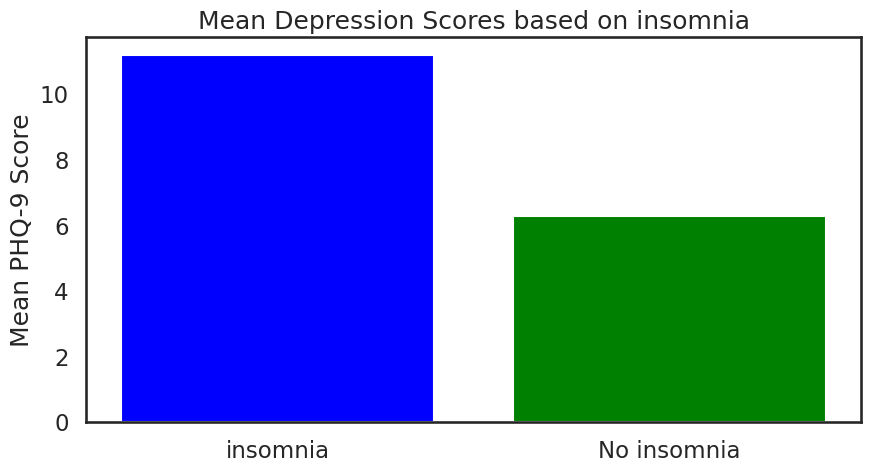

In [ ]:
# Separate data based on insomnia
insomnia = df[df["insomnia"] == 'yes']
no_insomnia = df[df["insomnia"] == 'no']

# Calculate the mean depression score for both cohorts
mean_insomnia = insomnia['phq9_score'].mean()
mean_no_insomnia = no_insomnia['phq9_score'].mean()

# Plot the means using a bar plot
plt.bar(['insomnia', 'No insomnia'], [mean_insomnia, mean_no_insomnia], color=['blue', 'green'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores based on insomnia')
plt.show()

#### **II. Insomnia & Psychedelic Mushroom Use vs. Depression**

13.621621621621621
10.588235294117647


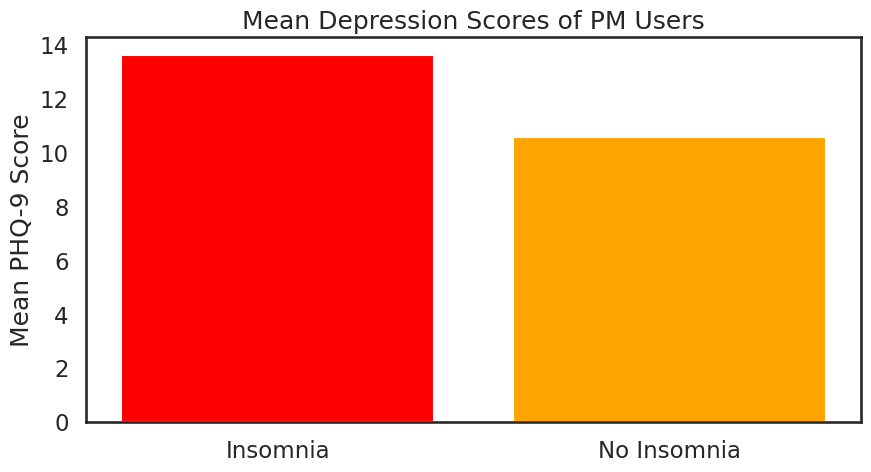

In [ ]:
# Seperate data based on Insomnia
insomnia_and_PM = df[(df["insomnia"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_insomnia_and_PM = df[(df["insomnia"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

# Calculate the mean depression for both cohorts
mean_insomnia_and_PM = insomnia_and_PM['phq9_score'].mean()
mean_no_insomnia_and_PM = no_insomnia_and_PM['phq9_score'].mean()

print(mean_insomnia_and_PM)
print(mean_no_insomnia_and_PM)

# Plot the means using a bar plot
plt.bar(['Insomnia', 'No Insomnia'], [mean_insomnia_and_PM, mean_no_insomnia_and_PM], color=['red', 'orange'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores of PM Users')
plt.show()

In [ ]:
t_val, p_val = ttest_ind(insomnia_and_PM['phq9_score'], no_insomnia_and_PM['phq9_score'])
print(p_val)

0.027679682509364163


Given that the p-value is less than 0.05, it seems that the difference in depression scores between pm users with insomnia and those without is statistically significant.

#Explore Demographic Factors

#### **I. Depression Scores by Ethnicity**

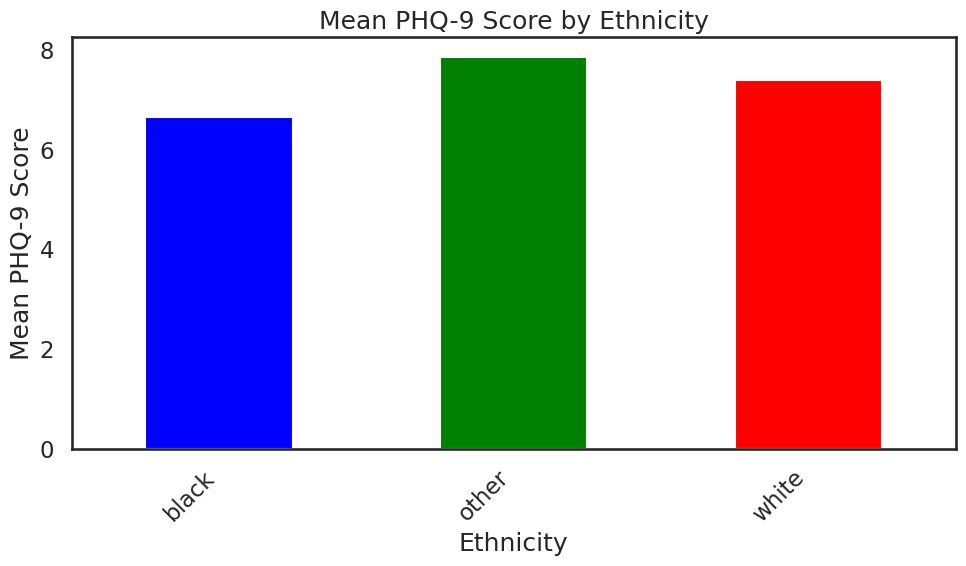

In [ ]:
df_filtered = df.dropna(subset=['phq9_score', 'ethnicity'])

ethnicity_grouped = df_filtered.groupby('ethnicity')['phq9_score'].mean()

colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
ethnicity_grouped.plot(kind='bar', color=colors)
plt.title('Mean PHQ-9 Score by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Mean PHQ-9 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [ ]:
#run an ANOVA test to see if there's a statistically significant difference between depression scores of different ethnicities
#need to use ANOVA if we're comparing more than two columns, which I learned about in my mathematical statistics class

group1 = df_filtered[df_filtered['ethnicity'] == 'black']['phq9_score']
group2 = df_filtered[df_filtered['ethnicity'] == 'other']['phq9_score']
group3 = df_filtered[df_filtered['ethnicity'] == 'white']['phq9_score']

f_statistic, p_value = f_oneway(group1, group2, group3)

print(p_value)

0.0005922533182151142


The p-value is virtually zero, indicating that there is a statistically significant difference in depression scores by ethnicity.


**II. Depression Scores by Age**



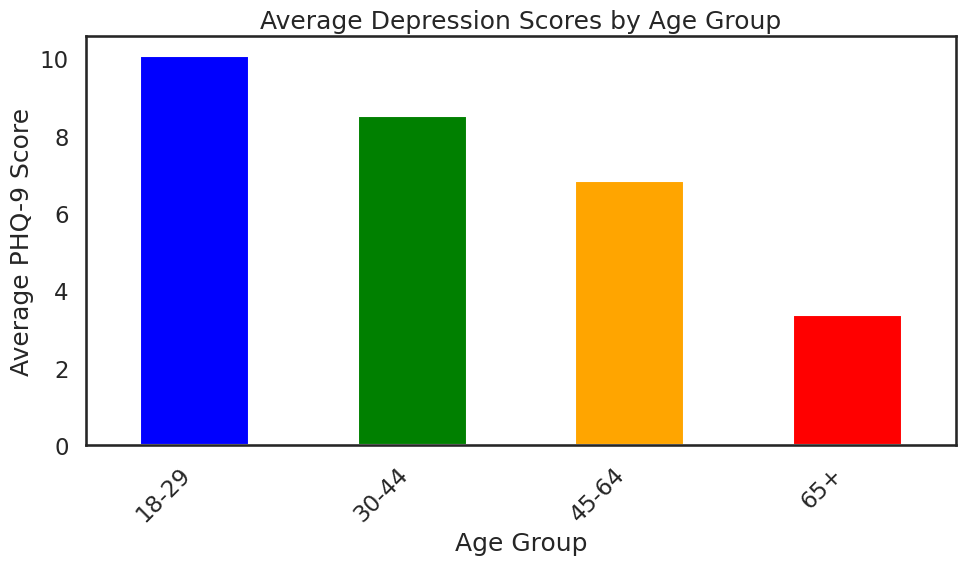

In [ ]:
df_filtered = df.dropna(subset=['phq9_score', 'age'])

# Define the age bins for grouping
age_bins = [18, 30, 45, 65, df_filtered['age'].max()]

# Create labels for age groups
age_labels = ['18-29', '30-44', '45-64', '65+']

# Split 'age' column into groups based on age_bins and create a new 'AgeGroup' column
df_filtered['AgeGroup'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average depression score for each age group
average_depression_scores = df_filtered.groupby('AgeGroup')['phq9_score'].mean()

# Create a list of colors for the bars
# You can customize this list of colors as per your preference
colors = ['blue', 'green', 'orange', 'red']

# Create the bar plot with different colors for each age group
plt.figure(figsize=(10, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
group1 = df_filtered[df_filtered['AgeGroup'] == '18-29']['phq9_score']
group2 = df_filtered[df_filtered['AgeGroup'] == '30-44']['phq9_score']
group3 = df_filtered[df_filtered['AgeGroup'] == '45-64']['phq9_score']
group4 = df_filtered[df_filtered['AgeGroup'] == '65+']['phq9_score']

f_statistic, p_value = f_oneway(group1, group2, group3, group4)

print(p_value)

3.6345602050639225e-161


The p-value is virtually zero, indicating that there is a statistically significant difference in depression scores by ethnicity.


**III. Depression Scores by Sex**



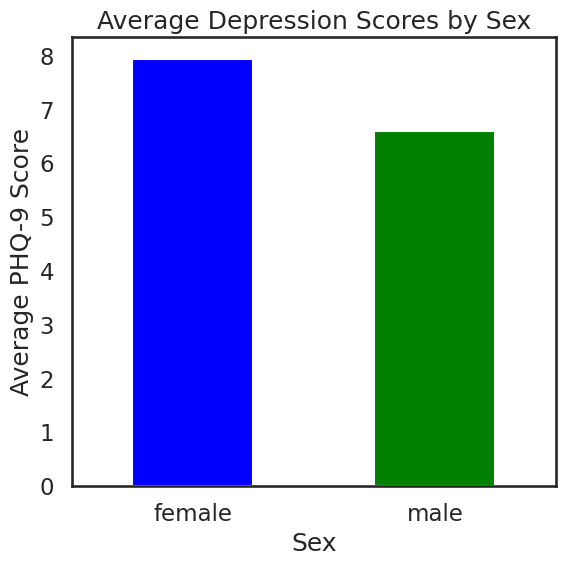

In [ ]:
df_filtered = df.dropna(subset=['phq9_score', 'sex'])

average_depression_scores = df_filtered.groupby('sex')['phq9_score'].mean()

colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(6, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=0)

plt.tight_layout()
male_scores = df_filtered[df_filtered['sex'] == 'male']['phq9_score']
female_scores = df_filtered[df_filtered['sex'] == 'female']['phq9_score']
plt.show()

In [ ]:
male_scores = df_filtered[df_filtered['sex'] == 'male']['phq9_score']
female_scores = df_filtered[df_filtered['sex'] == 'female']['phq9_score']

t_val, p_val = ttest_ind(male_scores, female_scores)
print(p_val)

3.4591203448186656e-16


**IV. Depression Scores by Income**




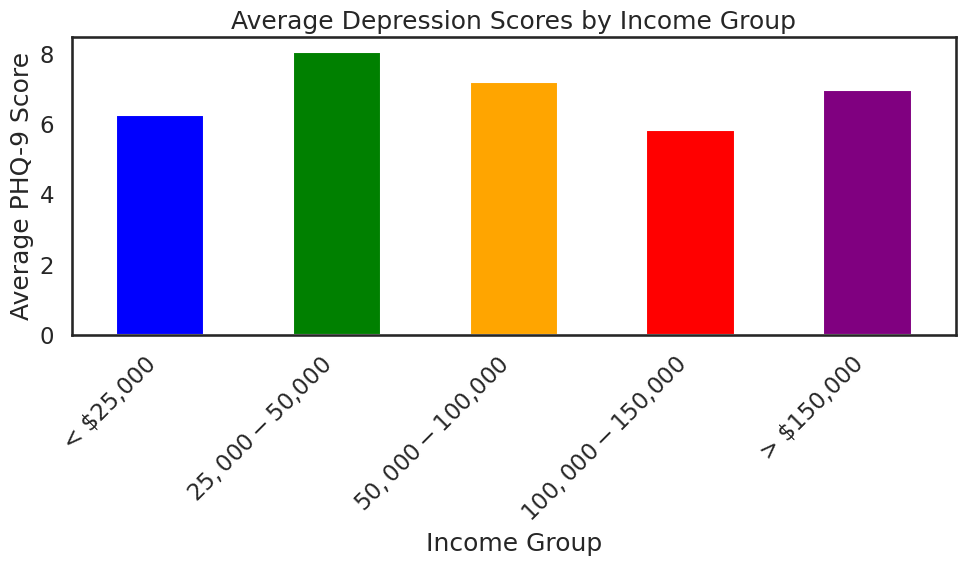

In [ ]:
df_filtered = df.dropna(subset=['phq9_score', 'income'])

income_bins = [0, 25000, 50000, 100000, 150000, float('inf')]

income_labels = ['< $25,000', '$25,000 - $50,000', '$50,000 - $100,000', '$100,000 - $150,000', '> $150,000']

df_filtered['IncomeGroup'] = pd.cut(df_filtered['income'], bins=income_bins, labels=income_labels, right=False)

average_depression_scores = df_filtered.groupby('IncomeGroup')['phq9_score'].mean()

colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(10, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
income_groups = [df_filtered[df_filtered['IncomeGroup'] == label]['phq9_score'] for label in income_labels]
f_statistic, p_value = f_oneway(*income_groups)

print(p_value)

6.1961622439324135e-12


**IV. Depression Scores by Region**


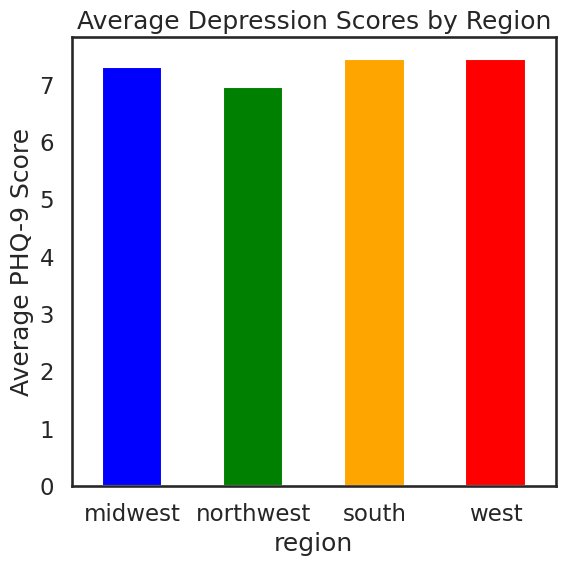

In [ ]:
df_filtered = df.dropna(subset=['phq9_score', 'region'])

average_depression_scores = df_filtered.groupby('region')['phq9_score'].mean()

colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(6, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Region')
plt.xlabel('region')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
group1 = df_filtered[df_filtered['region'] == 'midwest']['phq9_score']
group2 = df_filtered[df_filtered['region'] == 'northwest']['phq9_score']
group3 = df_filtered[df_filtered['region'] == 'south']['phq9_score']
group4 = df_filtered[df_filtered['region'] == 'west']['phq9_score']

f_statistic, p_value = f_oneway(group1, group2, group3, group4)

print(p_value)

0.2030765834010531
